## Word Embeddings and Vector Representations

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

text = "KBTU University has room for improvement in providing adequate resources and support to its students."

tokens = text.split()
token_df = pd.DataFrame(tokens, columns=["Token"])

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(token_df)

encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["Token"]))

print("Tokens:")
print(token_df)
print("\nOne-Hot Encoded Tokens:")
print(encoded_df)

Tokens:
          Token
0          KBTU
1    University
2           has
3          room
4           for
5   improvement
6            in
7     providing
8      adequate
9     resources
10          and
11      support
12           to
13          its
14    students.

One-Hot Encoded Tokens:
    Token_KBTU  Token_University  Token_adequate  Token_and  Token_for  \
0          1.0               0.0             0.0        0.0        0.0   
1          0.0               1.0             0.0        0.0        0.0   
2          0.0               0.0             0.0        0.0        0.0   
3          0.0               0.0             0.0        0.0        0.0   
4          0.0               0.0             0.0        0.0        1.0   
5          0.0               0.0             0.0        0.0        0.0   
6          0.0               0.0             0.0        0.0        0.0   
7          0.0               0.0             0.0        0.0        0.0   
8          0.0               0.0             

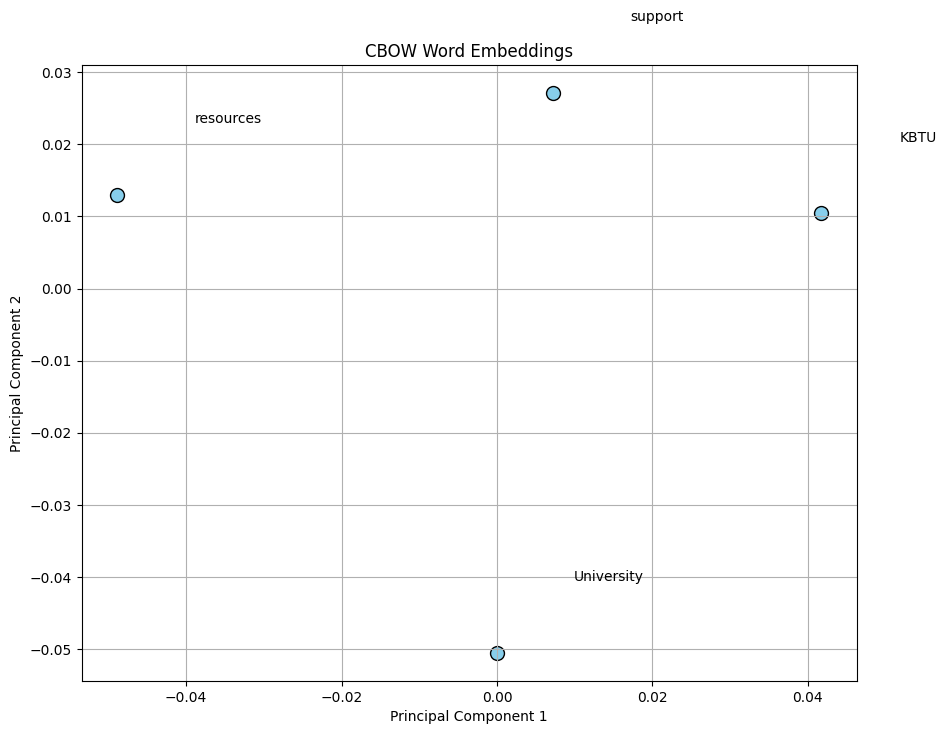

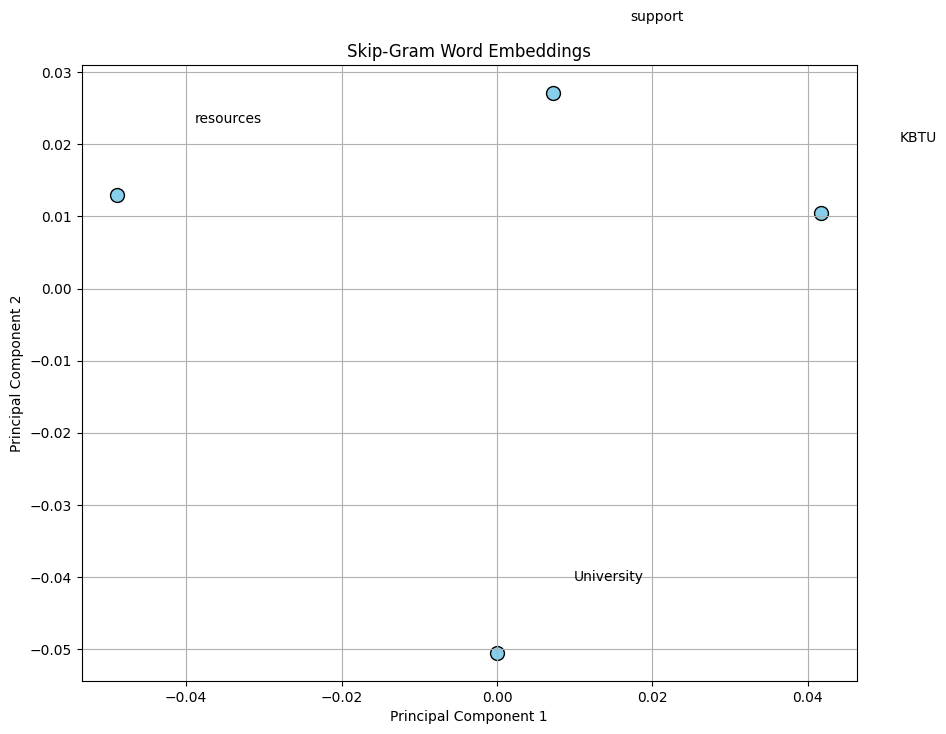

In [17]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

tokens = token_df["Token"].tolist()  
tokens = [tokens]  

model_cbow = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4, sg=0)
model_sg = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1)

cbow_kbtu = model_cbow.wv['KBTU']
cbow_resources = model_cbow.wv['resources']
sg_kbtu = model_sg.wv['KBTU']
sg_resources = model_sg.wv['resources']

def visualize_word_embeddings(model, words, title):
    word_vectors = np.array([model.wv[word] for word in words])
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    for word, (x, y) in zip(words, reduced_vectors):
        plt.scatter(x, y, color='skyblue', edgecolor='black', s=100)
        plt.text(x + 0.01, y + 0.01, word, fontsize=10)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

words_to_visualize = ["KBTU", "resources", "University", "support"]

visualize_word_embeddings(model_cbow, words_to_visualize, "CBOW Word Embeddings")
visualize_word_embeddings(model_sg, words_to_visualize, "Skip-Gram Word Embeddings")

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

cbow_vector_kbtu = model_cbow.wv['KBTU']
cbow_vector_resources = model_cbow.wv['resources']
sg_vector_kbtu = model_sg.wv['KBTU']
sg_vector_resources = model_sg.wv['resources']

def compute_cosine_similarity(vector1, vector2):
    vector1 = vector1.reshape(1, -1)  
    vector2 = vector2.reshape(1, -1)  
    return cosine_similarity(vector1, vector2)[0, 0]

cosine_sim_cbow = compute_cosine_similarity(cbow_vector_kbtu, cbow_vector_resources)
cosine_sim_sg = compute_cosine_similarity(sg_vector_kbtu, sg_vector_resources)

print("Cosine Similarity between 'KBTU' and 'resources' in CBOW model:", cosine_sim_cbow)
print("Cosine Similarity between 'KBTU' and 'resources' in Skip-Gram model:", cosine_sim_sg)

Cosine Similarity between 'KBTU' and 'resources' in CBOW model: -0.109138586
Cosine Similarity between 'KBTU' and 'resources' in Skip-Gram model: -0.109138586


In [23]:
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-100")
glove_vector = glove_vectors['support']

similar_words_glove = glove_vectors.most_similar('support')
print("Words similar to 'support' in GloVe embeddings:", similar_words_glove)

Words similar to 'support' in GloVe embeddings: [('supported', 0.827902615070343), ('backing', 0.7730779647827148), ('supporting', 0.7704546451568604), ('efforts', 0.7334232330322266), ('supports', 0.7252587676048279), ('leadership', 0.7252035737037659), ('effort', 0.7188873887062073), ('for', 0.716742753982544), ('government', 0.7160677909851074), ('help', 0.7136315107345581)]


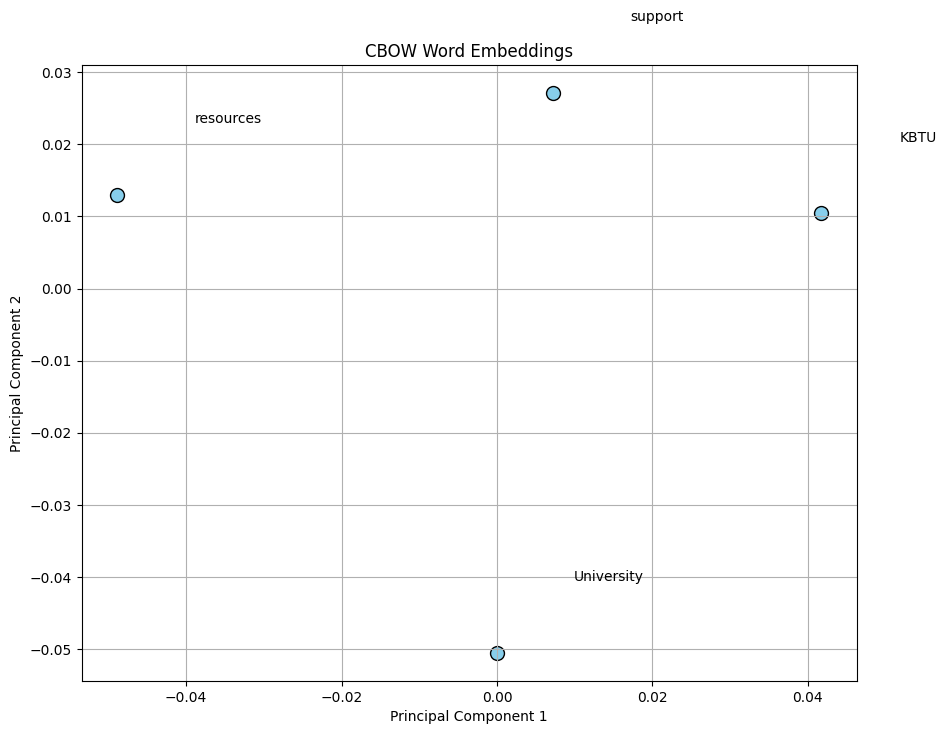

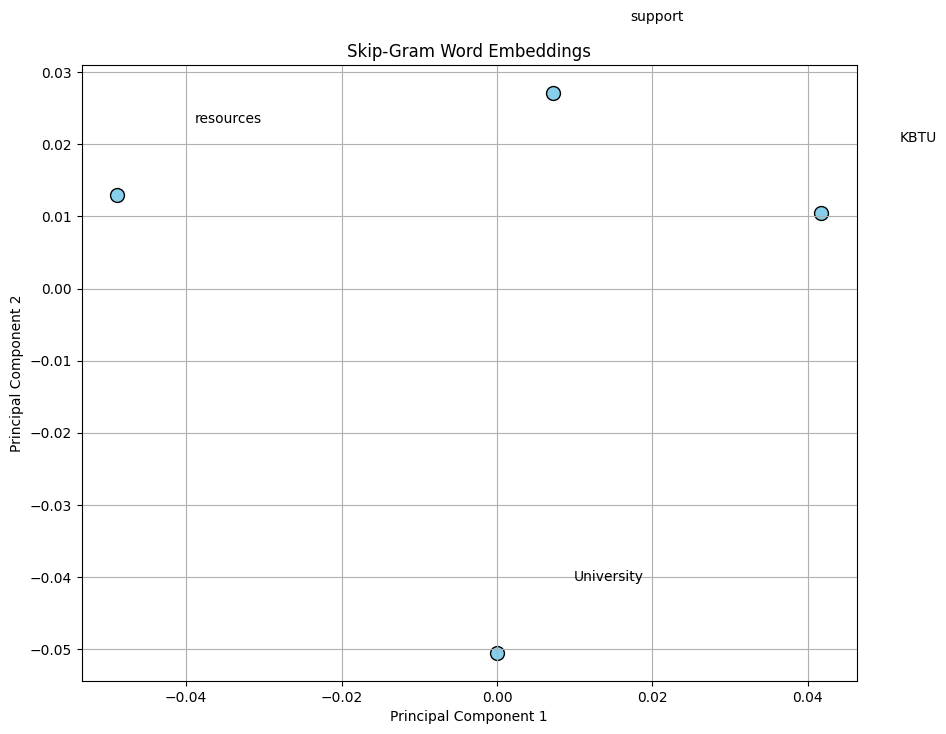

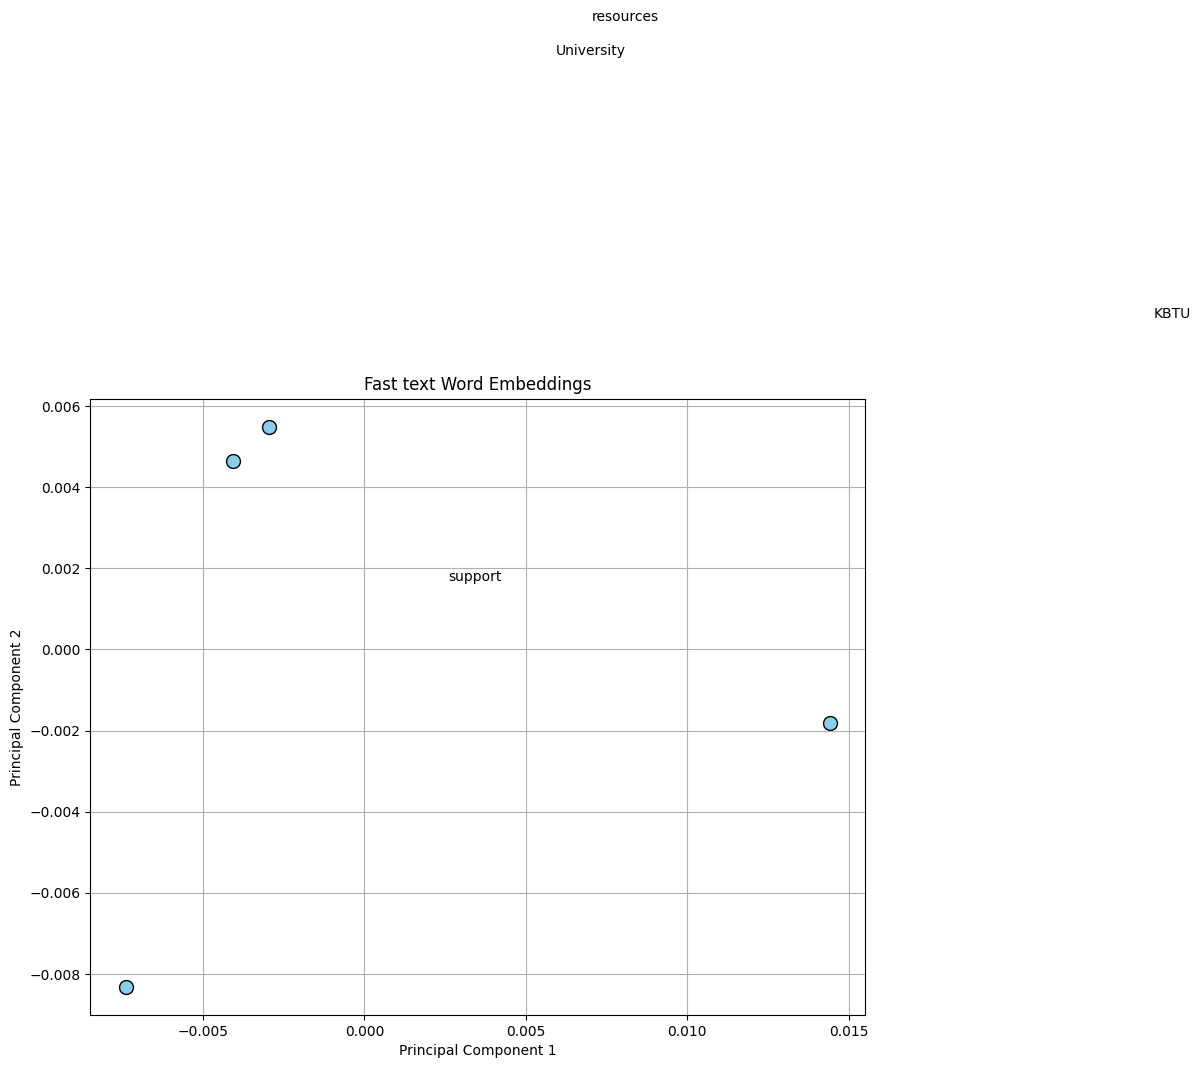

In [22]:
from gensim.models import FastText

model_ft = FastText(tokens, vector_size=100, window=5, min_count=1, workers=4)
model_ft.save("fasttext.model")
model_ft = FastText.load("fasttext.model")

ft_vector = model_ft.wv['support']

visualize_word_embeddings(model_cbow, words_to_visualize, "CBOW Word Embeddings")
visualize_word_embeddings(model_sg, words_to_visualize, "Skip-Gram Word Embeddings")
visualize_word_embeddings(model_ft, words_to_visualize, "Fast text Word Embeddings")

Epoch 1/10
391/391 [==============================] - 11s 26ms/step - loss: 0.6308 - accuracy: 0.6097 - val_loss: 0.4181 - val_accuracy: 0.8201
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.3696 - accuracy: 0.8384 - val_loss: 0.3774 - val_accuracy: 0.8432
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 0.4050 - accuracy: 0.8171 - val_loss: 0.4100 - val_accuracy: 0.8364
Epoch 4/10
391/391 [==============================] - 13s 32ms/step - loss: 0.2477 - accuracy: 0.9015 - val_loss: 0.4256 - val_accuracy: 0.8370
Epoch 5/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1621 - accuracy: 0.9398 - val_loss: 0.4952 - val_accuracy: 0.8159
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1371 - accuracy: 0.9483 - val_loss: 0.5384 - val_accuracy: 0.8176
Epoch 7/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0840 - accuracy: 0.9709 - val_loss: 0.6910 - val_accuracy:

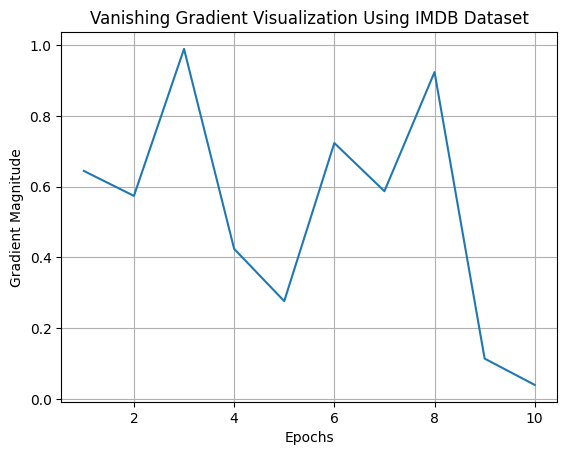

In [31]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    SimpleRNN(64, activation='tanh', dropout=0.2, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class GradientTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.gradients = []

    def on_epoch_end(self, epoch, logs=None):
        inputs = tf.convert_to_tensor(x_train[:10])  
        targets = tf.convert_to_tensor(y_train[:10])
        targets = tf.reshape(targets, (-1, 1)) 
        with tf.GradientTape() as tape:
            predictions = model(inputs, training=True)
            loss = tf.keras.losses.binary_crossentropy(targets, predictions)
        grads = tape.gradient(loss, model.trainable_weights)
        self.gradients.append([tf.reduce_mean(tf.abs(g)).numpy() for g in grads if g is not None])

tracker = GradientTracker()
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[tracker])

plt.plot(range(1, len(tracker.gradients) + 1), [np.mean(grad) for grad in tracker.gradients])
plt.title("Vanishing Gradient Visualization Using IMDB Dataset")
plt.xlabel("Epochs")
plt.ylabel("Gradient Magnitude")
plt.grid()
plt.show()

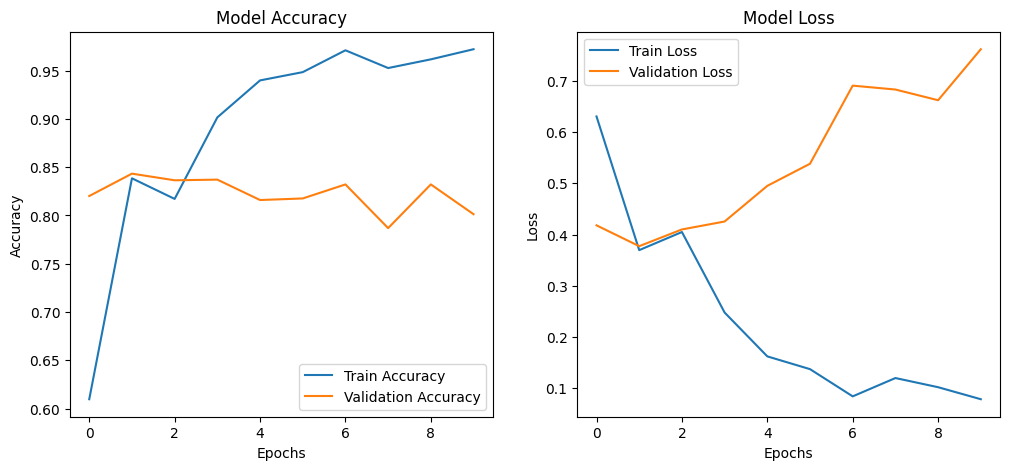

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## LSTM and GRU - Key Differences

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = 10000
maxlen = 500  

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 500, 128)          1280000   
                                                                 
 lstm_45 (LSTM)              (None, 64)                49408     
                                                                 
 dense_42 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import GRU

def create_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    model.add(GRU(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = create_gru_model()
gru_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [42]:
import time

print("Training LSTM model...")
start_time = time.time()
lstm_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)
lstm_training_time = time.time() - start_time
print(f"LSTM training time: {lstm_training_time:.2f} seconds")

print("\nTraining GRU model...")
start_time = time.time()
gru_history = gru_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)
gru_training_time = time.time() - start_time
print(f"GRU training time: {gru_training_time:.2f} seconds")

Training LSTM model...
Epoch 1/5
157/157 [==============================] - 313s 2s/step - loss: 0.0682 - accuracy: 0.9786 - val_loss: 0.4608 - val_accuracy: 0.8682
Epoch 2/5
157/157 [==============================] - 323s 2s/step - loss: 0.0660 - accuracy: 0.9786 - val_loss: 0.4902 - val_accuracy: 0.8644
Epoch 3/5
157/157 [==============================] - 292s 2s/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.6224 - val_accuracy: 0.8584
Epoch 4/5
157/157 [==============================] - 289s 2s/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.5148 - val_accuracy: 0.8054
Epoch 5/5
157/157 [==============================] - 289s 2s/step - loss: 0.0631 - accuracy: 0.9786 - val_loss: 0.5256 - val_accuracy: 0.8566
LSTM training time: 1506.67 seconds

Training GRU model...
Epoch 1/5
157/157 [==============================] - 299s 2s/step - loss: 0.2216 - accuracy: 0.9150 - val_loss: 0.3234 - val_accuracy: 0.8702
Epoch 2/5
157/157 [==============================] - 301s 2s/step 

LSTM Test Accuracy: 0.8496
GRU Test Accuracy: 0.8464


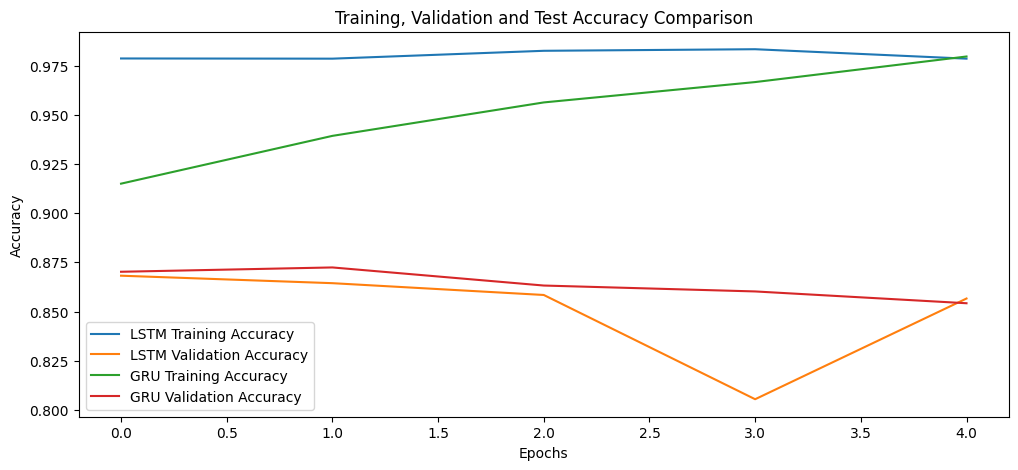

In [50]:
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f}")

gru_test_loss, gru_test_accuracy = gru_model.evaluate(x_test, y_test, verbose=0)
print(f"GRU Test Accuracy: {gru_test_accuracy:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title("Training, Validation and Test Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## LSTM Text Generation and Classification

In [87]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

with open('C:/Users/ayazh/Downloads/shakespeare.txt', 'r', encoding='utf-8') as file:
    text_data = file.read().lower()

vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, char_level=True)
tokenizer.fit_on_texts([text_data])
sequences = tokenizer.texts_to_sequences([text_data])[0]

seq_length = 60
max_samples = 1000000
X = []
y = []
for i in range(len(sequences) - seq_length):
    X.append(sequences[i:i + seq_length])
    y.append(sequences[i + seq_length])
X = pad_sequences(X[:max_samples], maxlen=seq_length, padding='pre')
y = np.array(y[:max_samples], dtype=np.int32)


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

def create_text_generation_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=seq_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

text_gen_model = create_text_generation_model(vocab_size=5000, seq_length=seq_length)
text_gen_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(buffer_size=10000).batch(1024).prefetch(tf.data.experimental.AUTOTUNE)
text_gen_model.fit(dataset, epochs=5, verbose=1, callbacks=[early_stopping])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 60, 32)            160000    
                                                                 
 lstm_39 (LSTM)              (None, 60, 64)            24832     
                                                                 
 dropout_16 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_40 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 5000)              325000    
                                                                 
Total params: 542,856
Trainable params: 542,856
Non-t

In [93]:
def generate_text_with_temperature(model, tokenizer, seed_text, length, seq_length, temperature):
    generated_text = seed_text
    for _ in range(length):
        token_list = tokenizer.texts_to_sequences([generated_text[-seq_length:]])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        adjusted_probs = np.log(predicted_probs + 1e-10) / temperature
        adjusted_probs = np.exp(adjusted_probs)
        adjusted_probs /= np.sum(adjusted_probs)
        predicted_index = np.random.choice(range(len(adjusted_probs)), p=adjusted_probs)
        output_char = tokenizer.index_word.get(predicted_index, '')
        generated_text += output_char
    return generated_text

seed_texts = [
    "to be, or not to be",
    "heaven knows it is but as a tomb, ",
    "mine eye and heart a league is took"
]

temperatures = [0.7, 1.0, 1.3]

for temp in temperatures:
    print(f"Text Generated with Temperature = {temp} \n")
    for i, seed_text in enumerate(seed_texts):
        generated = generate_text_with_temperature(
            model=text_gen_model, 
            tokenizer=tokenizer, 
            seed_text=seed_text, 
            length=200, 
            seq_length=seq_length, 
            temperature=temp
        )
        print(f"Seed Text {i + 1}: {seed_text}")
        print(f"Generated Text:\n{generated}\n")
        print("-" * 50)


Text Generated with Temperature = 0.7 

Seed Text 1: to be, or not to be
Generated Text:
to be, or not to be honn or uv' ten pererp bele sibget reer uf. bhe mir teunl ebir latate cut ipher mehiy gai, ha merotr
    shors
    ald basd povasthisus anphe thh dagen sofe hees suf wite wortt mas
    i tos tat hon 

--------------------------------------------------
Seed Text 2: heaven knows it is but as a tomb, 
Generated Text:
heaven knows it is but as a tomb, dhe meki                                                               
                                                                                                                     

         

--------------------------------------------------
Seed Text 3: mine eye and heart a league is took
Generated Text:
mine eye and heart a league is tookened aty bant
    toiy ty se ot wire che. arsatot tis are faus cold wort wotes arted rite au vesen,
    yis geegheus
    she lont tere poavef
    ol hise nasles on egent at fon unn ened ci

## LSTM and Bidirectional LSTM

### LSTM model from Exercise 2

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen) 

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.layers import Bidirectional

def create_bilstm_model(vocab_size, maxlen):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = create_bilstm_model(vocab_size, maxlen)
bilstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [13]:
import time

print("\nTraining LSTM model...")
start_time = time.time()
lstm_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)
lstm_training_time = time.time() - start_time
print(f"LSTM training time: {lstm_training_time:.2f} seconds")

print("\nTraining Bidirectional LSTM model...")
start_time = time.time()
bilstm_history = bilstm_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)
bilstm_training_time = time.time() - start_time
print(f"BiLSTM training time: {bilstm_training_time:.2f} seconds")


Training LSTM model...
Epoch 1/5
157/157 [==============================] - 86s 544ms/step - loss: 0.5013 - accuracy: 0.7550 - val_loss: 0.3361 - val_accuracy: 0.8588
Epoch 2/5
157/157 [==============================] - 73s 467ms/step - loss: 0.2522 - accuracy: 0.9019 - val_loss: 0.3269 - val_accuracy: 0.8716
Epoch 3/5
157/157 [==============================] - 74s 470ms/step - loss: 0.1784 - accuracy: 0.9352 - val_loss: 0.3232 - val_accuracy: 0.8728
Epoch 4/5
157/157 [==============================] - 76s 487ms/step - loss: 0.1260 - accuracy: 0.9568 - val_loss: 0.3460 - val_accuracy: 0.8484
Epoch 5/5
157/157 [==============================] - 77s 492ms/step - loss: 0.0960 - accuracy: 0.9671 - val_loss: 0.4063 - val_accuracy: 0.8612
LSTM training time: 386.74 seconds

Training Bidirectional LSTM model...
Epoch 1/5
157/157 [==============================] - 201s 1s/step - loss: 0.4390 - accuracy: 0.7869 - val_loss: 0.3466 - val_accuracy: 0.8624
Epoch 2/5
157/157 [======================

LSTM Test Accuracy: 0.8517
BiLSTM Test Accuracy: 0.8556


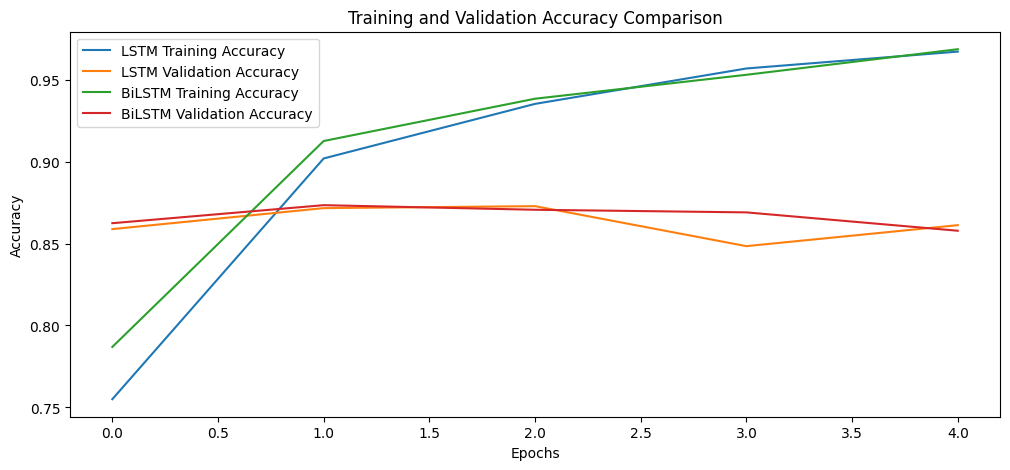

In [15]:
import matplotlib.pyplot as plt

lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f}")

bilstm_test_loss, bilstm_test_accuracy = bilstm_model.evaluate(x_test, y_test, verbose=0)
print(f"BiLSTM Test Accuracy: {bilstm_test_accuracy:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()